# Week 20 - Classification Metrics

This week's exercises will focus on classification and the use of different metrics in evaluating classifier performance.

The learning objectives of this lab are as follows:
1. Implement two classification models using modern Python library.
2. Implement methods to calculate precision and recall for a given set of results.
3. Compare and contrast two classification models using precision and recall.

To begin, let's set up some imports:

In [426]:
from sklearn.datasets import load_iris, make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as sk
import numpy as np

## 1. Creating Classifiers

To begin, we will use the same dataset as last week, the Iris flower dataset. This dataset not only contains four features of various iris flowers but also contains which type of Iris flower they refer to.

The code below loads the features of the flowers into training and testing datasets.

1. `train_x` contains the features for flowers in the training dataset.
2. `test_x` contains the features for flowers in the testing dataset.
3. `train_y` contains the classifications for flowers in the training dataset.
4. `test_y` contains the classifications for flowers in the testing dataset.

These have been generated using the `train_test_split` method in sklearn which randomly splits the data into training and testing based on the percentage of test items indicated in the parameters.

In [427]:
iris_data = load_iris()
iris_x = iris_data['data']
iris_y = iris_data['target']

train_x, test_x, train_y, test_y = train_test_split(iris_x, iris_y, test_size=0.3)

Next, for context let's take a look a the number of each classification in the datasets:

In [428]:
print("There are the following classes in the training dataset:")
for idx, cls in enumerate(iris_data['target_names']):
    cls_count = train_y[train_y == idx].shape[0]
    print(f"\t>{cls}: {cls_count}")
print("There are the following classes in the testing dataset:")
for idx, cls in enumerate(iris_data['target_names']):
    cls_count = test_y[test_y == idx].shape[0]
    print(f"\t> {cls}: {cls_count}")

There are the following classes in the training dataset:
	>setosa: 33
	>versicolor: 36
	>virginica: 36
There are the following classes in the testing dataset:
	> setosa: 17
	> versicolor: 14
	> virginica: 14


### 1.1 TASK: Logistic Regression

Use the `LogisticRegression` class to train a Logistic Regression classifier which can classify between the different types of flowers given in the Iris dataset.

To do this you will need to use the `train_x` and `train_y` datasets with the `.fit()` method, you may also want to increase the number of iterations used through the `max_iter` parameter.

For full details of the Logistic Regression method in Sklearn please see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [429]:
LogisticRegressionModel = LogisticRegression(max_iter=1000) # max_iter is the maximum number of iterations for the optimization algorithm to converge
LogisticRegressionModel.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

### 1.2 TASK: Decision Tree

Use the `DecisionTreeClassifier` class to train a Logistic Regression classifier which can classify between the different types of flowers given in the Iris dataset.

To do this you will need to use the `train_x` and `train_y` datasets with the `.fit()` method, you may also want to increase the number of iterations used through the `max_iter` parameter.

For full details of the Decision Tree Classifier method in Sklearn please see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [430]:
DecisionTreeClassifierModel = DecisionTreeClassifier()
DecisionTreeClassifierModel.fit(train_x, train_y)


DecisionTreeClassifier()

For context, the decision tree algorithm here uses CART by default which uses something called the 'Gini impurity' instead of entropy. To force the algorithm to use entropy you can set the `criterion` parameter when you create the `DecisionTreeClassifier`.

Once you have a trained model replace `<model>` in the line of code below to plot the decision tree!

[Text(0.3, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 105\nvalue = [33, 36, 36]\nclass = versicolor'),
 Text(0.2, 0.7857142857142857, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = setosa'),
 Text(0.4, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 72\nvalue = [0, 36, 36]\nclass = versicolor'),
 Text(0.3, 0.6428571428571429, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.5, 0.6428571428571429, 'petal width (cm) <= 1.7\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]\nclass = virginica'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]\nclass = versicolor'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(0.3, 0.35714285714285715, 'petal length (cm) <= 5.35\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.21428571428571427, 'petal length (cm) <= 5.05\ngini = 0.5\nsamples = 2\n

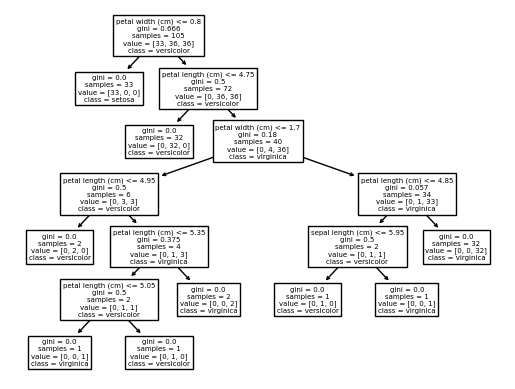

In [431]:
plot_tree(DecisionTreeClassifierModel, class_names=iris_data['target_names'], feature_names=iris_data['feature_names'])

## 2. Evaluating Classifiers

In the lectures we have been using the log-loss function to train our model but when it comes to providing metrics based on the final classifications there are three key methods you must be aware of. 

There are a number of benefits to using these metrics over log-loss, to start they are much easier to understand and explain. This is a huge benefit when describing results to non-technical stakeholders. Secondly they provide a good indication of which classes (when using multi-class and multi-label classification) our model is performing best on.

The first and simplest measure is the accuracy of a model which is simply the number of correct predictions over the number of predictions. This gives a single metric covering all classes however this hides the complexity revealed by precision and recall:

- Precision: The proportion of correctly identified positive cases.
- Recall: The proportion of the total number of positives were identified.

It is often common practice to average the precision and recall across all classes to provide a model-wide precision and recall. However, this again hides some complexity of the classifications.

If you need any guidance throughout this task regarding Accuracy, Recall and Precision please refer to these articles:
- [EvidentAI Article](https://www.evidentlyai.com/classification-metrics/multi-class-metrics)
- [Builtin Article](https://builtin.com/data-science/precision-and-recall)


### 2.1 TASK: Accuracy

Your first task in this section is to implement the accuracy algorithm.

Your method must take an array of predictions and an array of truth labels, and return an accuracy.

Accuracy can be calculated as follows:

$$ Accuracy(y, \hat{y}) = \frac{Correct Predictions}{Total Predictions}$$

In [432]:
def accuracy(y_true, y_pred):
    print(np.sum([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]))
    return np.sum([1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))])/len(y_pred)

### 2.2 TASK: Precision

Next, implement a precision algorithm which will calculate a precision for each class and then provide an average precision for the model.

Your method must take an array of predictions and an array of truth labels, and return an average precision.

To calculate the precision of a given class you can perform the following calculation:

$$ Precision_{0} = \frac{TP_{0}}{TP_{0}+FP_{0}}$$

Here, 0 is the class being calculated. $TP_{0}$ is the number of true positives (correctly identified) members of class 0 and $FP_{0}$ is the number of falsely identified members of the class.

To calculate an average precision across all the classes iterate and take the average:

$$ Average Precision = \frac{1}{n}\sum_{c=0}^{n}{Precision_{c}}$$

Here, n is the number of possible classifications.

In [433]:
def precision(y_true, y_pred, cls):
    true_positives = np.sum([1 if ((y_true[i] == cls) and (y_pred[i] == cls)) else 0 for i in range(len(y_true))])
    false_positives = np.sum([1 if ((y_true[i] != cls) and (y_pred[i] == cls)) else 0 for i in range(len(y_true))])
    return true_positives / (true_positives + false_positives)

def average_precision(y_true, y_pred):
    return np.mean([precision(y_true, y_pred, idx) for idx, cls in enumerate(iris_data['target_names'])])



### 2.3 TASK: Recall

Finally, implement a recall algorithm which will calculate a recall for each class and then provide an average recall for the model.

Your method must take an array of predictions and an array of truth labels, and return an average precision.

To calculate the recall of a given class you can perform the following calculation:

$$ Recall_{0} = \frac{TP_{0}}{TP_{0}+FN_{0}}$$

Here, 0 is the class being calculated. $TP_{0}$ is the number of true positives (correctly identified) members of class 0 and $FN_{0}$ is the number of items in this class which have been falsely classified as a different class.

To calculate an average recall across all the classes iterate and take the average:

$$ Average Recall = \frac{1}{n}\sum_{c=0}^{n}{Recall_{c}}$$

Here, n is the number of possible classifications.

In [434]:
def recall(y_true, y_pred, cls):
    # y_true_class = np.sum([1 if y_true[i] == cls else 0 for i in range(len(y_true))])
    # y_pred_class = np.sum([1 if y_pred[i] == cls else 0 for i in range(len(y_pred))])
    # y_pred_not_class = np.sum([1 if y_pred[i] != cls else 0 for i in range(len(y_pred))])
    true_positives = np.sum([1 if ((y_true[i] == cls) and (y_pred[i] == cls)) else 0 for i in range(len(y_true))])
    false_negatives = np.sum([1 if ((y_true[i] == cls) and (y_pred[i] != cls)) else 0 for i in range(len(y_true))])
    # false_positives = np.sum(y_true_class, y_pred_not_class)
    return true_positives / (true_positives + false_negatives)


def average_recall(y_true, y_pred):
    return np.mean([recall(y_true, y_pred, idx) for idx, cls in enumerate(iris_data['target_names'])])

## 3. Evaluating Classifiers

Now it's time to evaluate the classifiers you generated earlier using the metrics you've implemented above. 


### 3.1 TASK: Predictions

For both classifiers you created in section 1 generate predictions using the `test_x` dataset which contains unseen data. This means your classifier will hopefully perform worse than it would with `train_x`.

In [435]:
# Logistic Regression
predicted_y = LogisticRegressionModel.predict(test_x)
print("Logistic Regression")
print(f"Accuracy: {accuracy(test_y, predicted_y)}")
print(f"Average Precision: {average_precision(test_y, predicted_y)}")
print(f"Average Recall: {average_recall(test_y, predicted_y)}")


# Decision Tree
predicted_d_y = DecisionTreeClassifierModel.predict(test_x)
print("Decision Tree")
print(f"Accuracy: {accuracy(test_y, predicted_d_y)}")
print(f"Average Precision: {average_precision(test_y, predicted_d_y)}")
print(f"Average Recall: {average_recall(test_y, predicted_d_y)}")

Logistic Regression
43
Accuracy: 0.9555555555555556
Average Precision: 0.9523809523809524
Average Recall: 0.9523809523809524
Decision Tree
42
Accuracy: 0.9333333333333333
Average Precision: 0.9299145299145298
Average Recall: 0.9285714285714285


In [436]:
print("Scikit learn functions to test: ")
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(test_y, predicted_y)
precision = precision_score(test_y, predicted_y, average='macro')
recall = recall_score(test_y, predicted_y, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Scikit learn functions: 
Accuracy: 0.9555555555555556
Precision: 0.9523809523809524
Recall: 0.9523809523809524


### 3.2 TASK: Evaluating

Now, using the results from task 3.1 evaluate your classifiers using the metrics you have developed in section 2.

Once you've calculated each of the metrics for both your classifiers compare and contrast the results. Which one would you prefer to deploy?

In [437]:
# Evaluation
"""
Logistic Regression is better than Decision Tree in terms of accuracy, precision and recall.
The Decision Tree is not as good as the Logistic Regression because the Decision Tree is overfitting the training data.

"""

'\nLogistic Regression is better than Decision Tree in terms of accuracy, precision and recall.\nThe Decision Tree is not as good as the Logistic Regression because the Decision Tree is overfitting the training data.\n\n'

## (Optional) Confusion Matrix

Another way to visualise the performance of a classifier and in particular how your classifier has potentially mis-classified some of the dataset.

Referring to the [Sklearn confusion matrix documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) use a confusion matrix to evaluate your two classifiers. Can you identify which of the classes your methods have performed well on?

## (Optional Extension) Decision Tree Pruning

Pruning decision trees is a process which enables you to reduce the size of a decision tree by removing irrelevant and/or unimportant branches. For this final exercise I would like you to explore pruning techniques.
- [StatQuest](https://www.youtube.com/watch?v=D0efHEJsfHo)
